In [1]:
#!pip install bambi git+https://github.com/yannmclatchie/kulprit.git

In [2]:
import pandas as pd
import numpy as np

import bambi as bmb
import kulprit as kpt

import arviz as az
import matplotlib.pyplot as plt

/home/osvaldo/anaconda3/envs/kulprit/lib/python3.9/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
# define model data
data = data = bmb.load_data("my_data")

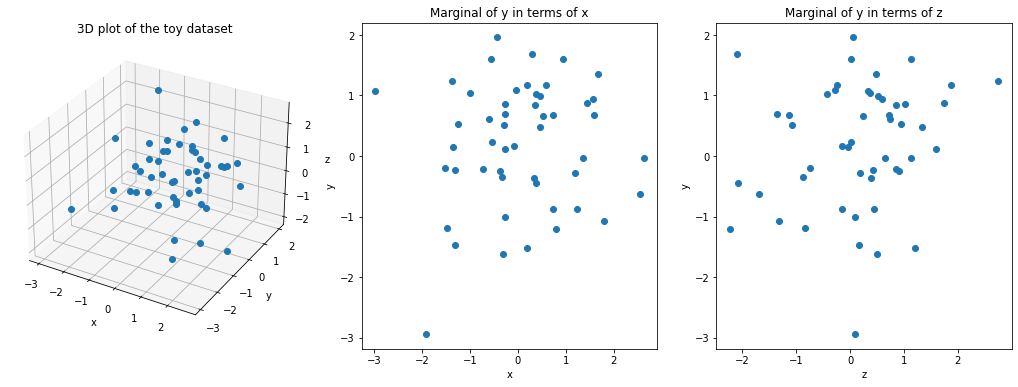

In [4]:
# plot the data
fig = plt.figure(figsize=(18, 6))

ax = fig.add_subplot(1, 3, 1, projection="3d")
ax.plot(data["x"], data["y"], data["z"], "o")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
ax.set_title("3D plot of the toy dataset")

ax = fig.add_subplot(1, 3, 2)
ax.plot(data["x"], data["y"], "o")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_title("Marginal of y in terms of x")

ax = fig.add_subplot(1, 3, 3)
ax.plot(data["z"], data["y"], "o")
ax.set_xlabel("z")
ax.set_ylabel("y")
ax.set_title("Marginal of y in terms of z");

In [5]:
# define and fit model with MCMC
model = bmb.Model("y ~ x + z", data, family="gaussian")
num_draws, num_chains = 2_000, 2
idata = model.fit(draws=num_draws, chains=num_chains)

WARNING (theano.tensor.blas): We did not find a dynamic library in the library_dir of the library we use for blas. If you use ATLAS, make sure to compile it with dynamics library.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [y_sigma, z, x, Intercept]


Sampling 2 chains for 1_000 tune and 2_000 draw iterations (2_000 + 4_000 draws total) took 2 seconds.


In [6]:
# build reference model object
ref_model = kpt.ReferenceModel(model, idata)
# project the reference model to some parameter subset and plot posterior
submodel = ref_model.project(terms=["x"])

/home/osvaldo/proyectos/00_BM/kulprit/src/kulprit/families/continuous.py:146: UserWarning: The use of `x.T` on tensors of dimension other than 2 to reverse their shape is deprecated and it will throw an error in a future release. Consider `x.mT` to transpose batches of matricesor `x.permute(*torch.arange(x.ndim - 1, -1, -1))` to reverse the dimensions of a tensor. (Triggered internally at  ../aten/src/ATen/native/TensorShape.cpp:2318.)
  + 1 / self.data.structure.num_obs * (f - f_perp).T @ (f - f_perp)


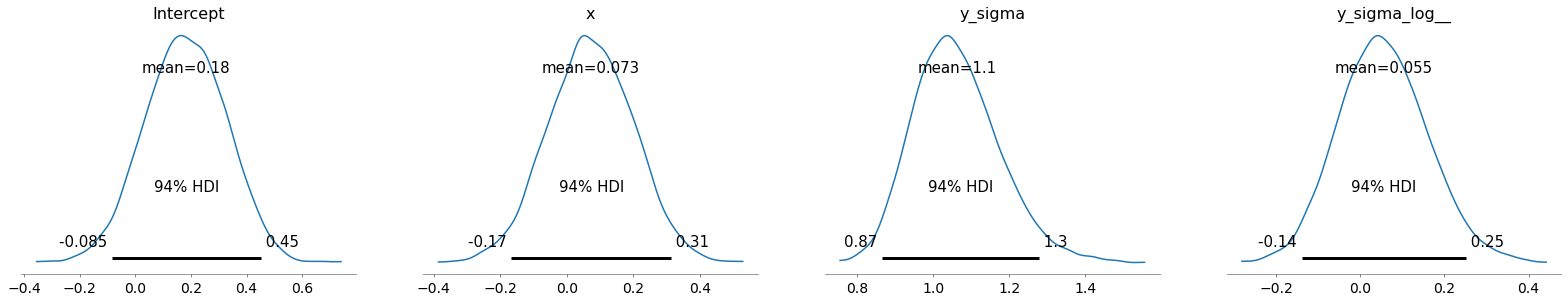

In [7]:
# visualise projected parameters
az.plot_posterior(submodel.idata);

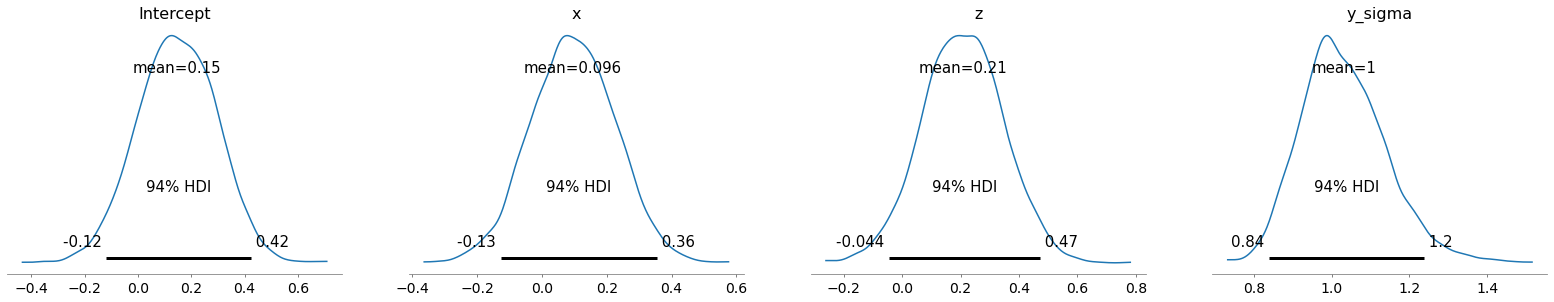

In [8]:
# compared to reference model
az.plot_posterior(idata, var_names=["Intercept", "x", "z", "y_sigma"]);

In [9]:
# compare full and submodel predictive performance
az.compare(dict(full=idata, sub=submodel.idata));

/home/osvaldo/anaconda3/envs/kulprit/lib/python3.9/site-packages/arviz/stats/stats.py:248: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ics = ics.append([ic_func(dataset, pointwise=True, scale=scale, var_name=var_name)])
/home/osvaldo/anaconda3/envs/kulprit/lib/python3.9/site-packages/arviz/stats/stats.py:248: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ics = ics.append([ic_func(dataset, pointwise=True, scale=scale, var_name=var_name)])


In [10]:
# project with gradient descent and compare to analytic solution
analytic_submodel = ref_model.project(terms=["x"], method="gradient")
az.compare(dict(analytic=submodel.idata, gradient=analytic_submodel.idata))

/home/osvaldo/anaconda3/envs/kulprit/lib/python3.9/site-packages/arviz/stats/stats.py:248: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ics = ics.append([ic_func(dataset, pointwise=True, scale=scale, var_name=var_name)])
/home/osvaldo/anaconda3/envs/kulprit/lib/python3.9/site-packages/arviz/stats/stats.py:248: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ics = ics.append([ic_func(dataset, pointwise=True, scale=scale, var_name=var_name)])


,rank,loo,p_loo,d_loo,weight,se,dse,warning,loo_scale
analytic,0,-74.65337,3.073275,0.00000,1.0,5.262975,0.000000,False,log
gradient,1,-76.33661,4.191821,1.68324,0.0,4.951332,0.362115,False,log


In [11]:
ref_model.search()

                        Terms  Distance from reference model
Model size                                                  
0                 [Intercept]                            0.0
1              [Intercept, z]                            0.0
2           [Intercept, z, x]                            0.0

hola


/home/osvaldo/anaconda3/envs/kulprit/lib/python3.9/site-packages/arviz/stats/stats.py:248: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ics = ics.append([ic_func(dataset, pointwise=True, scale=scale, var_name=var_name)])
/home/osvaldo/anaconda3/envs/kulprit/lib/python3.9/site-packages/arviz/stats/stats.py:248: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ics = ics.append([ic_func(dataset, pointwise=True, scale=scale, var_name=var_name)])
/home/osvaldo/anaconda3/envs/kulprit/lib/python3.9/site-packages/arviz/stats/stats.py:248: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ics = ics.append([ic_func(dataset, pointwise=True, scale=scale, var_name=var_name)])


,rank,loo,p_loo,d_loo,weight,se,dse,warning,loo_scale
0,0,-73.700273,1.889807,0.000000,4.546430e-01,5.248382,0.000000,False,log
1,1,-73.701817,2.888615,0.001544,5.453570e-01,5.718166,1.462256,False,log
2,2,-74.645605,4.153943,0.945332,6.661338e-16,5.653510,1.653979,False,log


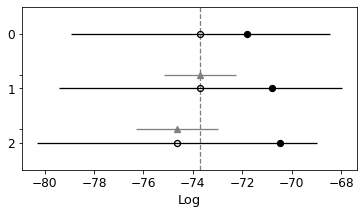

In [12]:
cmp, axes = ref_model.loo_compare(plot=True)
cmp

In [13]:
submodel = ref_model.project(1)
submodel.structure.term_names

['Intercept', 'z']